In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

### mPRS and vPRS calculated for all SNPs

In [2]:
#mPRS and vPRS caluculated for all SNPs
file_path1 = "/home/kunwar/SNP_BMI/PRS_BMI_snpboostlss_asl_bl.txt"
df_PRS_BMI = pd.read_csv(file_path1, delimiter ="\s+")
df_PRS_BMI

,IID,BMI,mPRS,vPRS,mPRS_decile,vPRS_decile,BMI_decile
0,1000015,27.5584,27.830928,1.445410,9,5,6
1,1000039,26.0776,27.357943,1.554951,6,9,5
2,1000040,23.5261,27.504461,1.546133,7,9,2
3,1000053,28.3353,27.740314,1.354586,8,2,7
4,1000064,33.4619,27.703637,1.386274,8,2,9
...,...,...,...,...,...,...,...
351886,6025388,30.1300,27.403458,1.321601,7,1,8
351887,6025396,28.8141,26.925567,1.415360,4,3,7
351888,6025418,25.8642,28.758789,1.571111,10,9,5
351889,6025429,21.0459,26.489959,1.433786,2,4,1


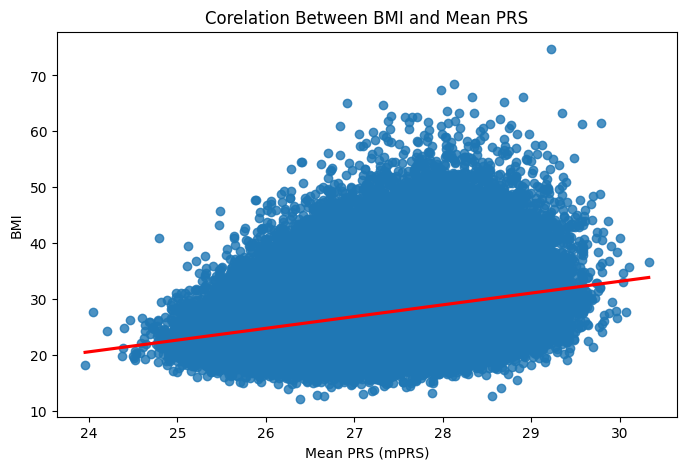

In [3]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df_PRS_BMI["mPRS"],
                y=df_PRS_BMI["BMI"],
               line_kws={"color": "red"})
plt.xlabel("Mean PRS (mPRS)")
plt.ylabel("BMI")
plt.title("Corelation Between BMI and Mean PRS")
plt.show()

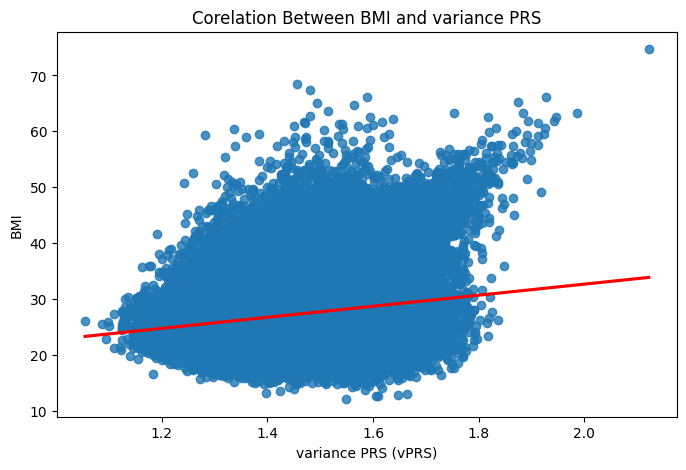

In [4]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df_PRS_BMI["vPRS"], 
            y=df_PRS_BMI["BMI"],
           line_kws={"color": "red"})
plt.xlabel("variance PRS (vPRS)")
plt.ylabel("BMI")
plt.title("Corelation Between BMI and variance PRS")
plt.show()

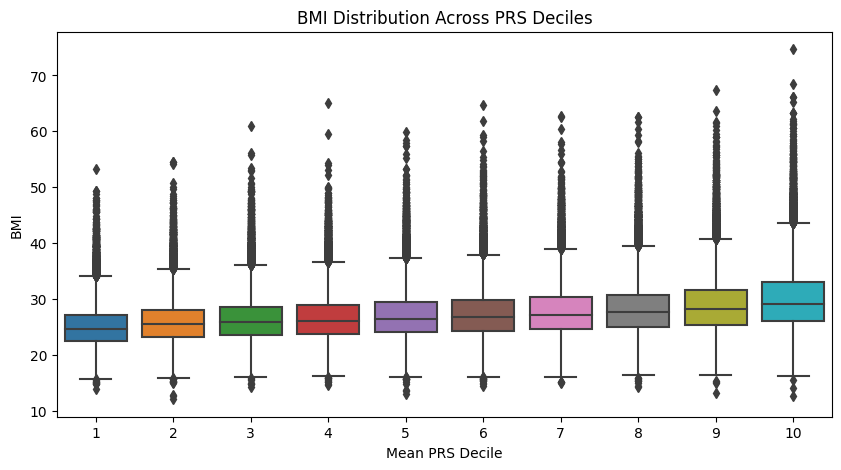

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_PRS_BMI["mPRS_decile"], y=df_PRS_BMI["BMI"])
plt.xlabel("Mean PRS Decile")
plt.ylabel("BMI")
plt.title("BMI Distribution Across PRS Deciles")
plt.show()

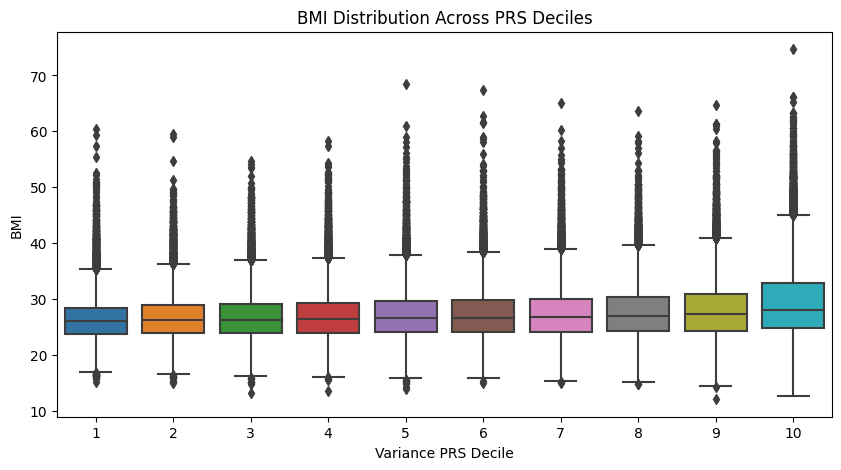

In [6]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_PRS_BMI["vPRS_decile"], y=df_PRS_BMI["BMI"])
plt.xlabel("Variance PRS Decile")
plt.ylabel("BMI")
plt.title("BMI Distribution Across PRS Deciles")
plt.show()

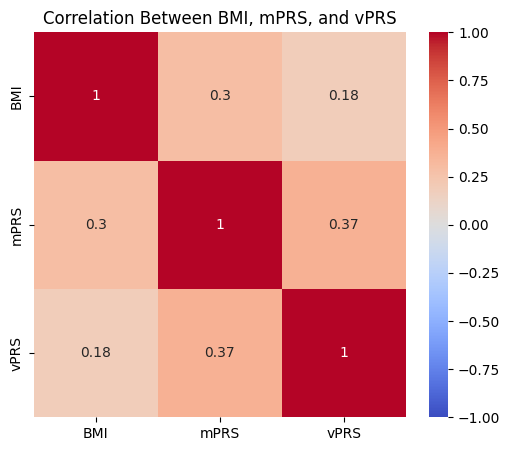

In [7]:
plt.figure(figsize=(6, 5))
sns.heatmap(df_PRS_BMI[["BMI", "mPRS", "vPRS"]].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between BMI, mPRS, and vPRS")
plt.show()

### *snpboostlss* selected variants

In [8]:
file_path2 = "/home/kunwar/SNP_BMI/SNP_BMI_snpboostlss_asl_bl.txt"
df_SNP_BMI = pd.read_csv(file_path2, delimiter ="\s+")
df_SNP_BMI

,SNP,CHR,POS,coef_mu,coef_sigma
0,rs11127485,2,632028,-0.077567,-0.001114
1,rs7189927,16,28913787,0.038011,0.006297
2,rs925946,11,27667202,0.011234,0.000000
3,Affx-52330258,16,28925977,0.009168,0.001124
4,rs3130349,6,32147696,0.010660,0.000000
...,...,...,...,...,...
5887,rs11346635,1,207478250,0.000000,-0.000796
5888,rs11943671,4,186203972,0.000000,-0.009987
5889,rs73711741,7,98311041,0.000000,0.002226
5890,rs75229699,1,10691829,0.000000,-0.003296


In [9]:
#add two new columns with absolute values from "coef_mu" and "coef_sigma". 
#This makes the analysis easier later eg. while plotting
df_SNP_BMI = df_SNP_BMI.assign(
    abs_coef_mu = lambda df: df["coef_mu"].abs(),
    abs_coef_sigma = lambda df: df["coef_sigma"].abs()
)
df_SNP_BMI

,SNP,CHR,POS,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma
0,rs11127485,2,632028,-0.077567,-0.001114,0.077567,0.001114
1,rs7189927,16,28913787,0.038011,0.006297,0.038011,0.006297
2,rs925946,11,27667202,0.011234,0.000000,0.011234,0.000000
3,Affx-52330258,16,28925977,0.009168,0.001124,0.009168,0.001124
4,rs3130349,6,32147696,0.010660,0.000000,0.010660,0.000000
...,...,...,...,...,...,...,...
5887,rs11346635,1,207478250,0.000000,-0.000796,0.000000,0.000796
5888,rs11943671,4,186203972,0.000000,-0.009987,0.000000,0.009987
5889,rs73711741,7,98311041,0.000000,0.002226,0.000000,0.002226
5890,rs75229699,1,10691829,0.000000,-0.003296,0.000000,0.003296


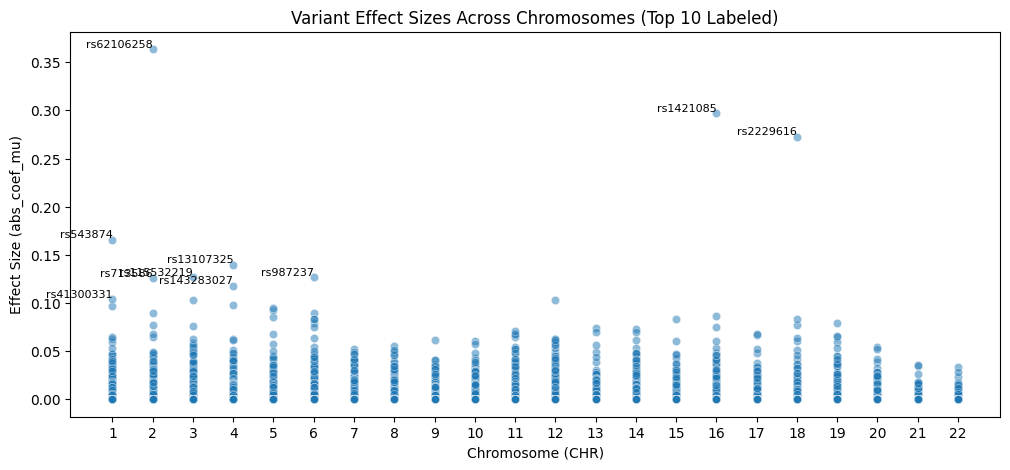

In [10]:
from adjustText import adjust_text
plt.figure(figsize=(12, 5))
# Convert CHR to string and for numerical sorting
df_SNP_BMI["CHR"] = df_SNP_BMI["CHR"].astype(str)
chromosomes = sorted(df_SNP_BMI["CHR"].unique(), key=lambda x: (not x.isdigit(), int(x) if x.isdigit() else float('inf')))
df_SNP_BMI["CHR"] = pd.Categorical(df_SNP_BMI["CHR"], categories=chromosomes, ordered=True)
sns.scatterplot(x=df_SNP_BMI["CHR"], 
                y=df_SNP_BMI["abs_coef_mu"].abs(), 
                alpha=0.5)
# top 10 SNPs with highest effect sizes
top_snps = df_SNP_BMI.nlargest(10, "abs_coef_mu")
# Add SNP labels to the top 10 points
for _, row in top_snps.iterrows():
    plt.text(row["CHR"], row["abs_coef_mu"], row["SNP"], fontsize=8, ha='right', va='bottom')


texts = []
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xticks(ticks=np.arange(len(chromosomes)), labels=chromosomes)
plt.xlabel("Chromosome (CHR)")
plt.ylabel("Effect Size (abs_coef_mu)")
plt.title("Variant Effect Sizes Across Chromosomes (Top 10 Labeled)")
plt.show()

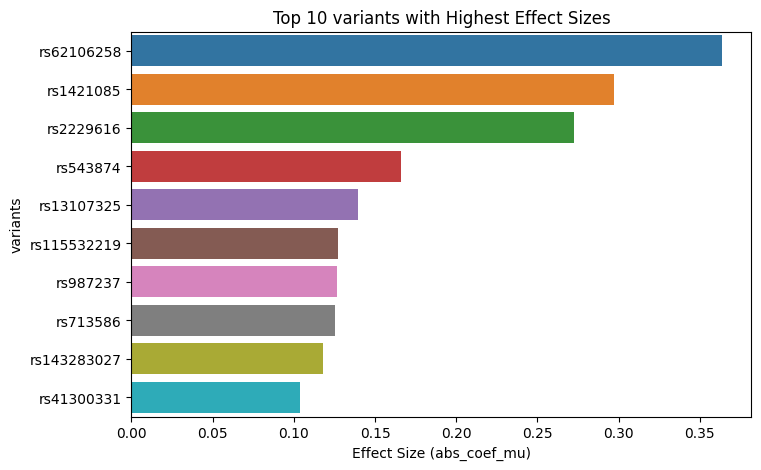

In [11]:
top_snps = df_SNP_BMI.nlargest(10, "abs_coef_mu")
plt.figure(figsize=(8, 5))
sns.barplot(y=top_snps["SNP"], 
            x=top_snps["abs_coef_mu"], 
            orient="h")
plt.xlabel("Effect Size (abs_coef_mu)")
plt.ylabel("variants")
plt.title("Top 10 variants with Highest Effect Sizes")
plt.show()

### Annotation using ANNOVAR
for detail see: `/home/kunwar/annovar/annovar.sh`

Now we want to annotate the *snpboostlss* annotated variants. For this, all SNPs from UK-Biobank were annotated first and merged with *snpboostlss* selected variants. 

In [12]:
# annotated file from UKBB
ukbb_annotated = "/home/kunwar/annovar/annovar_results/myannotation.hg19_multianno.txt" 
df_ukbb_annotated = pd.read_csv(ukbb_annotated, sep="\t")
df_ukbb_annotated

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
0,1,723307,723307,G,C,intergenic,"LOC100288069,FAM87B",dist=9293;dist=29444,.,.
1,1,727841,727841,A,G,intergenic,"LOC100288069,FAM87B",dist=13827;dist=24910,.,.
2,1,729632,729632,T,C,intergenic,"LOC100288069,FAM87B",dist=15618;dist=23119,.,.
3,1,752721,752721,A,G,upstream,FAM87B,dist=30,.,.
4,1,754105,754105,T,C,ncRNA_exonic,FAM87B,.,.,.
...,...,...,...,...,...,...,...,...,...,...
672895,23,154859910,154859910,C,A,intergenic,"NONE,NONE",dist=NONE;dist=NONE,.,.
672896,23,154865915,154865915,G,A,intergenic,"NONE,NONE",dist=NONE;dist=NONE,.,.
672897,23,154899846,154899846,A,G,intergenic,"NONE,NONE",dist=NONE;dist=NONE,.,.
672898,23,154900890,154900890,T,C,intergenic,"NONE,NONE",dist=NONE;dist=NONE,.,.


In [13]:
# Merge files based on matching 'POS' from df1 and 'Start' from df2
df_SNP_BMI_annotated = df_SNP_BMI.merge(df_ukbb_annotated[['Start',
                                                'Ref', 
                                                'Alt', 
                                                'Func.refGene', 
                                                'Gene.refGene', 
                                                'GeneDetail.refGene', 
                                                'ExonicFunc.refGene', 
                                                'AAChange.refGene']], left_on="POS", right_on="Start", how="left")
df_SNP_BMI_annotated

,SNP,CHR,POS,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,Start,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
0,rs11127485,2,632028,-0.077567,-0.001114,0.077567,0.001114,632028.0,C,T,intergenic,"LOC105373352,TMEM18",dist=69936;dist=31850,.,.
1,rs7189927,16,28913787,0.038011,0.006297,0.038011,0.006297,28913787.0,T,C,intronic,ATP2A1,.,.,.
2,rs925946,11,27667202,0.011234,0.000000,0.011234,0.000000,27667202.0,T,G,ncRNA_intronic,BDNF-AS,.,.,.
3,Affx-52330258,16,28925977,0.009168,0.001124,0.009168,0.001124,28925977.0,CT,C,.,.,.,.,.
4,rs3130349,6,32147696,0.010660,0.000000,0.010660,0.000000,32147696.0,A,G,exonic,RNF5,.,synonymous SNV,RNF5:NM_006913:exon4:c.G315G:p.P105P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,rs11346635,1,207478250,0.000000,-0.000796,0.000000,0.000796,207478250.0,T,TA,intergenic,"C4BPA,CD55",dist=159933;dist=16773,.,.
5911,rs11943671,4,186203972,0.000000,-0.009987,0.000000,0.009987,186203972.0,T,C,exonic,SNX25,.,synonymous SNV,SNX25:NM_001378032:exon6:c.C1106C:p.T369T
5912,rs73711741,7,98311041,0.000000,0.002226,0.000000,0.002226,98311041.0,T,G,intergenic,"NPTX2,TMEM130",dist=51860;dist=133072,.,.
5913,rs75229699,1,10691829,0.000000,-0.003296,0.000000,0.003296,10691829.0,A,G,intergenic,"PEX14,CASZ1",dist=1014;dist=4837,.,.


In [14]:
# Drop the redundant 'Start' column from df_SNP_BMI_annotated after merging
df_SNP_BMI_annotated = df_SNP_BMI_annotated.drop_duplicates(subset="POS", keep="first")
df_SNP_BMI_annotated

,SNP,CHR,POS,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,Start,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
0,rs11127485,2,632028,-0.077567,-0.001114,0.077567,0.001114,632028.0,C,T,intergenic,"LOC105373352,TMEM18",dist=69936;dist=31850,.,.
1,rs7189927,16,28913787,0.038011,0.006297,0.038011,0.006297,28913787.0,T,C,intronic,ATP2A1,.,.,.
2,rs925946,11,27667202,0.011234,0.000000,0.011234,0.000000,27667202.0,T,G,ncRNA_intronic,BDNF-AS,.,.,.
3,Affx-52330258,16,28925977,0.009168,0.001124,0.009168,0.001124,28925977.0,CT,C,.,.,.,.,.
4,rs3130349,6,32147696,0.010660,0.000000,0.010660,0.000000,32147696.0,A,G,exonic,RNF5,.,synonymous SNV,RNF5:NM_006913:exon4:c.G315G:p.P105P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5910,rs11346635,1,207478250,0.000000,-0.000796,0.000000,0.000796,207478250.0,T,TA,intergenic,"C4BPA,CD55",dist=159933;dist=16773,.,.
5911,rs11943671,4,186203972,0.000000,-0.009987,0.000000,0.009987,186203972.0,T,C,exonic,SNX25,.,synonymous SNV,SNX25:NM_001378032:exon6:c.C1106C:p.T369T
5912,rs73711741,7,98311041,0.000000,0.002226,0.000000,0.002226,98311041.0,T,G,intergenic,"NPTX2,TMEM130",dist=51860;dist=133072,.,.
5913,rs75229699,1,10691829,0.000000,-0.003296,0.000000,0.003296,10691829.0,A,G,intergenic,"PEX14,CASZ1",dist=1014;dist=4837,.,.


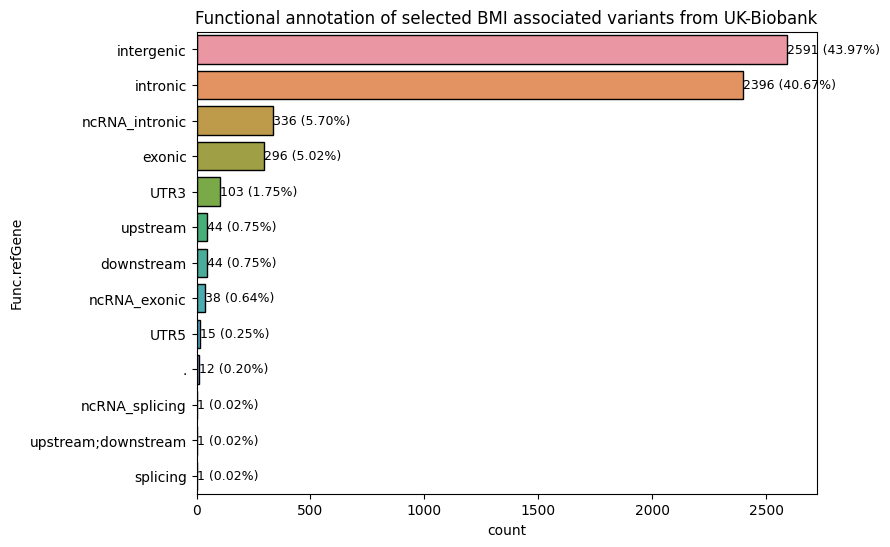

In [15]:
# Calculate total number of values for percentage calculation
total = len(df_SNP_BMI_annotated)

plt.figure(figsize=(8, 6))
ax = sns.countplot(
    y=df_SNP_BMI_annotated["Func.refGene"], 
    edgecolor="black", 
    order=df_SNP_BMI_annotated["Func.refGene"].value_counts().index
)

# Annotate counts and percentages on each bar
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        # Calculate percentage
        percentage = (width / total) * 100
        ax.text(
            width + 0.3,  # Position the text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically
            f'{int(width)} ({percentage:.2f}%)',  # Display count and percentage
            ha='left',  # Align text to the left
            va='center',  # Center text vertically
            fontsize=9
        )

plt.title("Functional annotation of selected BMI associated variants from UK-Biobank")
plt.show()

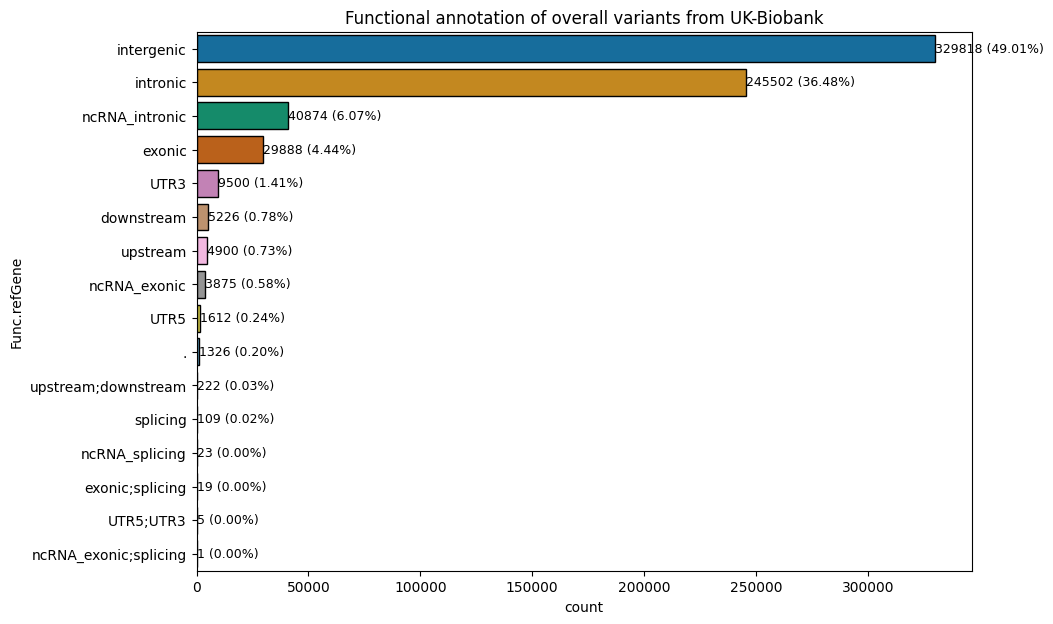

In [16]:
# Calculate total number of values for percentage calculation
total = len(df_ukbb_annotated)

plt.figure(figsize=(10, 7))
ax = sns.countplot(
    y=df_ukbb_annotated["Func.refGene"], 
    edgecolor="black", 
    palette="colorblind",
    order=df_ukbb_annotated["Func.refGene"].value_counts().index
)

# Annotate counts and percentages on each bar
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        # Calculate percentage
        percentage = (width / total) * 100
        ax.text(
            width + 0.3,  # Position the text slightly to the right of the bar
            p.get_y() + p.get_height() / 2,  # Center the text vertically
            f'{int(width)} ({percentage:.2f}%)',  # Display count and percentage
            ha='left',  # Align text to the left
            va='center',  # Center text vertically
            fontsize=9
        )
plt.title("Functional annotation of overall variants from UK-Biobank")
plt.show()

> The above plot is created to do the comparison between the functionally annotated overall variants from UKBB and BMI assocated variants selected by our model

In [17]:
# Save the result to a new .txt file
#df_SNP_BMI_annotated.to_csv("/home/kunwar/SNP_BMI/SNP_BMI_snpboostlss_asl_bl_annotated.txt", sep="\t", index=False)
print("Annotation completed!")
#print("Output saved here: /home/kunwar/SNP_BMI/SNP_BMI_snpboostlss_asl_bl_annotated.txt.")

Annotation completed!


In [18]:
# top 10 SNPs with highest effect sizes
top_snps_BMI_annotated = df_SNP_BMI_annotated.nlargest(10, "abs_coef_mu")
top_snps_BMI_annotated

,SNP,CHR,POS,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,Start,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
1291,rs62106258,2,417167,-0.363516,-0.032073,0.363516,0.032073,417167.0,C,T,intergenic,"LINC01865,LINC01874",dist=80113;dist=73780,.,.
1731,rs1421085,16,53800954,0.297173,0.029625,0.297173,0.029625,53800954.0,C,T,intronic,FTO,.,.,.
1102,rs2229616,18,58039276,-0.272726,0.000000,0.272726,0.000000,58039276.0,T,C,exonic,MC4R,.,synonymous SNV,MC4R:NM_005912:exon1:c.G307G:p.V103V
2242,rs543874,1,177889480,0.165750,0.010972,0.165750,0.010972,177889480.0,G,A,intergenic,"LINC01741,SEC16B",dist=210015;dist=8444,.,.
452,rs13107325,4,103188709,0.139792,0.003261,0.139792,0.003261,103188709.0,T,C,exonic,SLC39A8,.,synonymous SNV,"SLC39A8:NM_001135148:exon7:c.G970G:p.A324A,SLC..."
2255,rs115532219,3,12938762,0.126956,0.000000,0.126956,0.000000,12938762.0,T,C,UTR3,IQSEC1,"NM_001134382:c.*3720A>G,NM_001376938:c.*3720A>...",.,.
623,rs987237,6,50803050,0.126853,0.010280,0.126853,0.010280,50803050.0,G,A,intronic,TFAP2B,.,.,.
521,rs713586,2,25158008,0.125431,0.005950,0.125431,0.005950,25158008.0,C,T,intergenic,"ADCY3,DNAJC27",dist=14902;dist=8497,.,.
2233,rs143283027,4,1527768,0.117867,0.014854,0.117867,0.014854,1527768.0,A,G,intergenic,"NKX1-1,FAM53A",dist=127538;dist=113840,.,.
1901,rs41300331,1,62629319,-0.103747,0.000000,0.103747,0.000000,62629319.0,A,G,UTR3,PATJ,"NM_001350145:c.*2593A>G,NM_176877:c.*2712A>G",.,.


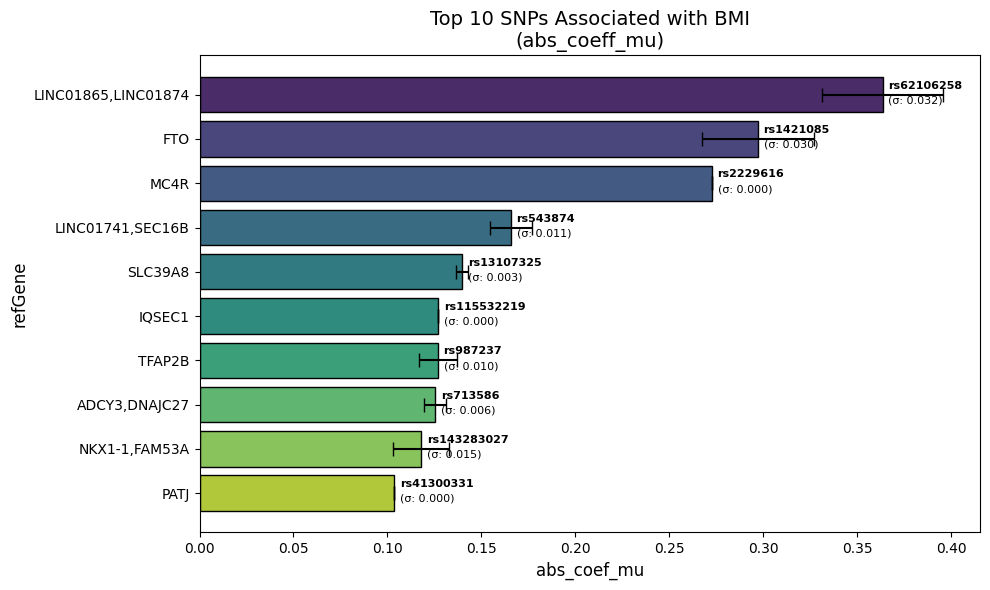

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_snps_BMI_annotated,
    x="abs_coef_mu",  
    y="Gene.refGene", 
    palette="viridis",
    capsize=0.1,  
    errcolor="black", 
    errwidth=1,
    edgecolor="black", 
    errorbar=None
)
# Annotate SNP names at the end of bars
for index, row in enumerate(top_snps_BMI_annotated.itertuples()):
    plt.text(row.abs_coef_mu + 0.003, index-0.20, row.SNP, va="center", fontsize=8, fontweight="bold")
    plt.text(row.abs_coef_mu + 0.003, index+0.20, f"(σ: {row.abs_coef_sigma:.3f})", fontsize=8)

# Add error bars manually
plt.errorbar(
    x=top_snps_BMI_annotated["abs_coef_mu"], 
    y=range(len(top_snps_BMI_annotated)), 
    xerr=top_snps_BMI_annotated["abs_coef_sigma"],
    fmt="none", 
    ecolor="black", 
    capsize=5
)
plt.ylabel("refGene", fontsize=12)
plt.xlabel("abs_coef_mu", fontsize=12)
plt.title("Top 10 SNPs Associated with BMI\n(abs_coeff_mu)", fontsize=14)
plt.tight_layout()
plt.show()

In [20]:
top_snps_BMI_annotated_sigma = df_SNP_BMI_annotated.nlargest(10, "abs_coef_sigma")
top_snps_BMI_annotated_sigma

,SNP,CHR,POS,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,Start,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene
1291,rs62106258,2,417167,-0.363516,-0.032073,0.363516,0.032073,417167.0,C,T,intergenic,"LINC01865,LINC01874",dist=80113;dist=73780,.,.
1731,rs1421085,16,53800954,0.297173,0.029625,0.297173,0.029625,53800954.0,C,T,intronic,FTO,.,.,.
3370,rs116873887,18,49614444,0.000000,-0.021773,0.000000,0.021773,49614444.0,A,G,intergenic,"LINC01630,DCC",dist=525605;dist=252123,.,.
3533,rs1017618,2,199990731,0.000000,-0.019756,0.000000,0.019756,199990731.0,A,G,intergenic,"LINC01923,SATB2",dist=750910;dist=143492,.,.
4553,rs117895800,13,22579636,0.000000,-0.019734,0.000000,0.019734,22579636.0,A,C,intergenic,"LINC00424,LINC00540",dist=127337;dist=204788,.,.
4019,rs12418441,11,15696609,0.000000,-0.019151,0.000000,0.019151,15696609.0,T,G,ncRNA_intronic,LINC02751,.,.,.
1820,rs60368737,2,45482602,0.013904,0.018928,0.013904,0.018928,45482602.0,A,G,upstream,LINC01121,dist=522,.,.
4030,rs1805977,5,9255419,0.000000,-0.018754,0.000000,0.018754,9255419.0,C,T,intronic,SEMA5A,.,.,.
3270,rs56257715,7,70995459,0.000000,0.018445,0.000000,0.018445,70995459.0,A,G,intronic,GALNT17,.,.,.
3740,rs77167127,11,12741030,0.000000,-0.018285,0.000000,0.018285,12741030.0,T,C,intronic,TEAD1,.,.,.


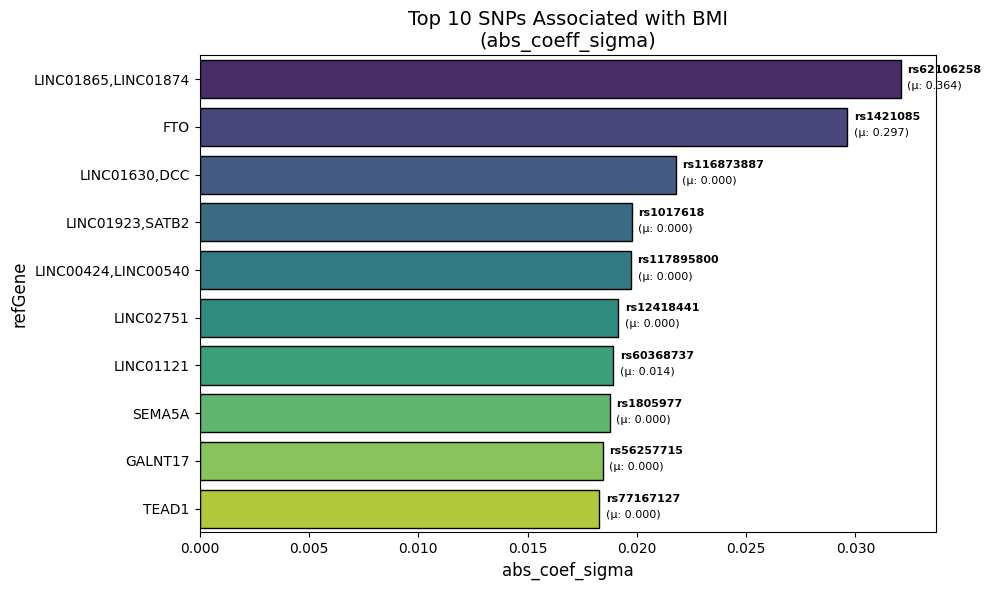

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top_snps_BMI_annotated_sigma,
    x="abs_coef_sigma",  
    y="Gene.refGene", 
    palette="viridis",
    capsize=0.1,  
    errcolor="black", 
    errwidth=1,
    edgecolor="black", 
    errorbar=None
)
# Annotate SNP names at the end of bars
for index, row in enumerate(top_snps_BMI_annotated_sigma.itertuples()):
    plt.text(row.abs_coef_sigma+0.0003, index-0.20, row.SNP, va="center", fontsize=8, fontweight="bold")
    plt.text(row.abs_coef_sigma+0.0003, index+0.20, f"(μ: {row.abs_coef_mu:.3f})", fontsize=8)
    
plt.ylabel("refGene", fontsize=12)
plt.xlabel("abs_coef_sigma", fontsize=12)
plt.title("Top 10 SNPs Associated with BMI\n(abs_coeff_sigma)", fontsize=14)
plt.tight_layout()
plt.show()

### Check the overlap at the level of LD block

see: `/home/kunwar/SNP_BMI/download_ld_blocks_and_format_files.sh` for script to downolad and format the files. 

File with LD blocks was downloaded from here: 

https://bitbucket.org/nygcresearch/ldetectdata/raw/ac125e47bf7ff3e90be31f278a7b6a61daaba0dc/EUR/fourier_ls-all.bed

Also note that `bedtools intersect -a fourier_ls-all.sorted_with_LD_blocks.bed -b SNP_BMI_snpboostlss_asl_bl_annotated.sorted.bed -wa -wb` was used to find the overlap between SNPs associated with BMI and the file with LD blocks (genome build 19). See the output overlap file here: `/home/kunwar/SNP_BMI/overlap_bl.bed` 

In [22]:
df_LD_blocks = pd.read_csv("/home/kunwar/SNP_BMI/fourier_ls-all.sorted_with_LD_blocks.bed", delimiter = "\t")
df_SNPs_BMI_overlap = pd.read_csv("/home/kunwar/SNP_BMI/overlap_bl.bed", delimiter = "\t", header = None, 
                          names = ["LD_block_chr", "LD_block_start", "LD_block_stop", "LD_Block", "SNP_chr", "SNP_start", "SNP_stop","SNP", "Ref", "Alt", "Func.refGene", "Gene.refGene"])


In [23]:
df_LD_blocks

,chr,start,stop,Block
0,chr1,10583,1892607,Block1
1,chr1,1892607,3582736,Block2
2,chr1,3582736,4380811,Block3
3,chr1,4380811,5913893,Block4
4,chr1,5913893,7247335,Block5
...,...,...,...,...
1698,chr9,135298842,137041122,Block1699
1699,chr9,137041122,137589364,Block1700
1700,chr9,137589364,138938978,Block1701
1701,chr9,138938978,139500342,Block1702


In [24]:
df_SNPs_BMI_overlap

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene
0,chr1,10583,1892607,Block1,chr1,1597020,1597021,rs72634820,G,C,UTR3,SLC35E2B
1,chr1,10583,1892607,Block1,chr1,1707740,1707741,rs12041925,G,T,intronic,NADK
2,chr1,1892607,3582736,Block2,chr1,2424765,2424766,rs12409875,A,G,intronic,PLCH2
3,chr1,1892607,3582736,Block2,chr1,2709392,2709393,rs12044475,A,G,intronic,TTC34
4,chr1,1892607,3582736,Block2,chr1,3014693,3014694,rs2376813,G,A,intronic,PRDM16
...,...,...,...,...,...,...,...,...,...,...,...,...
5887,chr9,138938978,139500342,Block1702,chr9,138994591,138994592,rs1747832,G,C,intergenic,"NACC2,TMEM250"
5888,chr9,139500342,141144796,Block1703,chr9,140463369,140463370,rs80150317,A,G,intronic,DPH7
5889,chr9,139500342,141144796,Block1703,chr9,140527985,140527986,rs117556206,G,A,intronic,EHMT1
5890,chr9,139500342,141144796,Block1703,chr9,140654590,140654591,rs4610828,T,C,intronic,EHMT1


In [25]:
df_SNPs_BMI_overlap["LD_Block"].value_counts()

Block1362    18
Block377     18
Block195     16
Block24      13
Block1006    13
             ..
Block569      1
Block577      1
Block1458     1
Block583      1
Block428      1
Name: LD_Block, Length: 1532, dtype: int64

>
**SNPs associated with BMI are spread over 1532/1703 LD blocks**

## Computation of overlap between mPRS and vPRS at variant, at gene and LD block levels (only mPRS,only vPRS, shared) 

To do this let's add some more information to df_SNPs_BMI_overlap dataframe. Added columns: **abs_coef_mu**, **abs_coef_sigma**. This can be done by merging **df_SNPS_BMI_overlap** with **df_SNP_BMI_annotated** on the chosen columns

In [26]:
df_SNPs_BMI_overlap_updated = pd.merge(df_SNPs_BMI_overlap,
                                       df_SNP_BMI_annotated[["SNP","coef_mu", "coef_sigma","abs_coef_mu", "abs_coef_sigma"]], 
                                       on="SNP", 
                                       how="inner")
df_SNPs_BMI_overlap_updated

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma
0,chr1,10583,1892607,Block1,chr1,1597020,1597021,rs72634820,G,C,UTR3,SLC35E2B,-0.019588,0.000000,0.019588,0.000000
1,chr1,10583,1892607,Block1,chr1,1707740,1707741,rs12041925,G,T,intronic,NADK,-0.019174,0.000000,0.019174,0.000000
2,chr1,1892607,3582736,Block2,chr1,2424765,2424766,rs12409875,A,G,intronic,PLCH2,-0.012036,0.000000,0.012036,0.000000
3,chr1,1892607,3582736,Block2,chr1,2709392,2709393,rs12044475,A,G,intronic,TTC34,-0.024185,0.000000,0.024185,0.000000
4,chr1,1892607,3582736,Block2,chr1,3014693,3014694,rs2376813,G,A,intronic,PRDM16,0.000000,0.001393,0.000000,0.001393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,chr9,138938978,139500342,Block1702,chr9,138994591,138994592,rs1747832,G,C,intergenic,"NACC2,TMEM250",0.000000,0.000848,0.000000,0.000848
5888,chr9,139500342,141144796,Block1703,chr9,140463369,140463370,rs80150317,A,G,intronic,DPH7,0.000000,0.002820,0.000000,0.002820
5889,chr9,139500342,141144796,Block1703,chr9,140527985,140527986,rs117556206,G,A,intronic,EHMT1,0.000000,0.006785,0.000000,0.006785
5890,chr9,139500342,141144796,Block1703,chr9,140654590,140654591,rs4610828,T,C,intronic,EHMT1,-0.006447,0.000000,0.006447,0.000000


### Overlap at the level of variant

In [27]:
df_SNPs_BMI_overlap_updated["category"] = df_SNPs_BMI_overlap_updated.apply(lambda row: 
    "mu_only_variants" if row["abs_coef_mu"] != 0 and row["abs_coef_sigma"] == 0 else
    "sigma_only_variants" if row["abs_coef_sigma"] != 0 and row["abs_coef_mu"] == 0 else
    "shared_variants",
    axis=1)

In [28]:
df_SNPs_BMI_overlap_updated

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,category
0,chr1,10583,1892607,Block1,chr1,1597020,1597021,rs72634820,G,C,UTR3,SLC35E2B,-0.019588,0.000000,0.019588,0.000000,mu_only_variants
1,chr1,10583,1892607,Block1,chr1,1707740,1707741,rs12041925,G,T,intronic,NADK,-0.019174,0.000000,0.019174,0.000000,mu_only_variants
2,chr1,1892607,3582736,Block2,chr1,2424765,2424766,rs12409875,A,G,intronic,PLCH2,-0.012036,0.000000,0.012036,0.000000,mu_only_variants
3,chr1,1892607,3582736,Block2,chr1,2709392,2709393,rs12044475,A,G,intronic,TTC34,-0.024185,0.000000,0.024185,0.000000,mu_only_variants
4,chr1,1892607,3582736,Block2,chr1,3014693,3014694,rs2376813,G,A,intronic,PRDM16,0.000000,0.001393,0.000000,0.001393,sigma_only_variants
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,chr9,138938978,139500342,Block1702,chr9,138994591,138994592,rs1747832,G,C,intergenic,"NACC2,TMEM250",0.000000,0.000848,0.000000,0.000848,sigma_only_variants
5888,chr9,139500342,141144796,Block1703,chr9,140463369,140463370,rs80150317,A,G,intronic,DPH7,0.000000,0.002820,0.000000,0.002820,sigma_only_variants
5889,chr9,139500342,141144796,Block1703,chr9,140527985,140527986,rs117556206,G,A,intronic,EHMT1,0.000000,0.006785,0.000000,0.006785,sigma_only_variants
5890,chr9,139500342,141144796,Block1703,chr9,140654590,140654591,rs4610828,T,C,intronic,EHMT1,-0.006447,0.000000,0.006447,0.000000,mu_only_variants


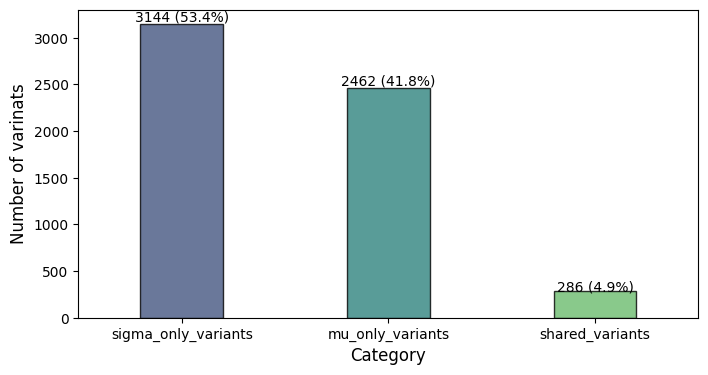

In [29]:
category_counts = df_SNPs_BMI_overlap_updated["category"].value_counts()
total = category_counts.sum()
plt.figure(figsize = (8,4))
ax = sns.barplot(
    x=category_counts.index, 
    y=category_counts.values, 
    palette="viridis",
    edgecolor = "black",
    width = 0.4,
    alpha = 0.8
)
for i, count in enumerate(category_counts.values):
    percent = (count / total) * 100
    plt.text(i, count + count*0.01, f"{count} ({percent:.1f}%)", ha="center", fontsize=10)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of varinats", fontsize=12)
plt.show()

> **Please note that there are two genes associated with the same variant. So first need to split those variants with two genes into two separate rows while keeping other column values intact**

In [30]:
df_SNPs_BMI_overlap_updated_with_splitted_genes = df_SNPs_BMI_overlap_updated.copy().assign(
    Gene_refGene=df_SNPs_BMI_overlap_updated["Gene.refGene"].str.split(r"[,;|]")
).explode("Gene_refGene")
df_SNPs_BMI_overlap_updated_with_splitted_genes

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,category,Gene_refGene
0,chr1,10583,1892607,Block1,chr1,1597020,1597021,rs72634820,G,C,UTR3,SLC35E2B,-0.019588,0.000000,0.019588,0.000000,mu_only_variants,SLC35E2B
1,chr1,10583,1892607,Block1,chr1,1707740,1707741,rs12041925,G,T,intronic,NADK,-0.019174,0.000000,0.019174,0.000000,mu_only_variants,NADK
2,chr1,1892607,3582736,Block2,chr1,2424765,2424766,rs12409875,A,G,intronic,PLCH2,-0.012036,0.000000,0.012036,0.000000,mu_only_variants,PLCH2
3,chr1,1892607,3582736,Block2,chr1,2709392,2709393,rs12044475,A,G,intronic,TTC34,-0.024185,0.000000,0.024185,0.000000,mu_only_variants,TTC34
4,chr1,1892607,3582736,Block2,chr1,3014693,3014694,rs2376813,G,A,intronic,PRDM16,0.000000,0.001393,0.000000,0.001393,sigma_only_variants,PRDM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,chr9,139500342,141144796,Block1703,chr9,140463369,140463370,rs80150317,A,G,intronic,DPH7,0.000000,0.002820,0.000000,0.002820,sigma_only_variants,DPH7
5889,chr9,139500342,141144796,Block1703,chr9,140527985,140527986,rs117556206,G,A,intronic,EHMT1,0.000000,0.006785,0.000000,0.006785,sigma_only_variants,EHMT1
5890,chr9,139500342,141144796,Block1703,chr9,140654590,140654591,rs4610828,T,C,intronic,EHMT1,-0.006447,0.000000,0.006447,0.000000,mu_only_variants,EHMT1
5891,chr9,139500342,141144796,Block1703,chr9,140738371,140738372,rs76047384,A,G,intergenic,"MIR602,LOC100133077",0.000000,-0.004209,0.000000,0.004209,sigma_only_variants,MIR602


> **Our dataframe contains . and NONE values in the "Gene_refGene" column, we need to get rid of those variants as they are not assigned to any genes.**

In [31]:
#rows with . values in "Gene_refGene" column
df_SNPs_BMI_overlap_updated_with_splitted_genes[df_SNPs_BMI_overlap_updated_with_splitted_genes["Gene_refGene"].str.match(r"^.$", na=False)]

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,category,Gene_refGene
102,chr1,38731847,40200567,Block24,chr1,40149641,40149642,Affx-52347909,TGCGCCCG,T,.,.,0.000000,-0.001025,0.000000,0.001025,sigma_only_variants,.
986,chr11,116383348,117747110,Block288,chr11,117030633,117030634,Affx-52324980,TC,T,.,.,0.024365,0.000000,0.024365,0.000000,mu_only_variants,.
1496,chr13,80585676,82581814,Block424,chr13,82292162,82292163,rs35620356,AC,A,.,.,0.000000,-0.002234,0.000000,0.002234,sigma_only_variants,.
2020,chr16,27445755,29036613,Block575,chr16,28925977,28925978,Affx-52330258,CT,C,.,.,0.009168,0.001124,0.009168,0.001124,shared_variants,.
2312,chr17,64800430,67858770,Block645,chr17,66519857,66519858,Affx-14220429,CT,C,.,.,0.005624,0.000000,0.005624,0.000000,mu_only_variants,.
2376,chr18,5834180,7090485,Block658,chr18,7002412,7002413,rs140928228,GA,G,.,.,0.000000,-0.001414,0.000000,0.001414,sigma_only_variants,.
3800,chr3,149043237,150252004,Block1062,chr3,149238595,149238596,rs112399999,CTTAA,C,.,.,0.000000,-0.001765,0.000000,0.001765,sigma_only_variants,.
3814,chr3,156008700,157312028,Block1067,chr3,156978919,156978920,rs35386937,AT,A,.,.,0.018351,0.000000,0.018351,0.000000,mu_only_variants,.
4783,chr6,50386145,52210476,Block1362,chr6,51794313,51794314,rs5876245,GT,G,.,.,0.013738,0.000000,0.013738,0.000000,mu_only_variants,.
5051,chr7,16902069,19481547,Block1453,chr7,17273374,17273375,Affx-30120430,CT,C,.,.,-0.005700,0.000000,0.005700,0.000000,mu_only_variants,.


In [32]:
#rows with NONE values in "Gene_refGene" column
df_SNPs_BMI_overlap_updated_with_splitted_genes[df_SNPs_BMI_overlap_updated_with_splitted_genes["Gene_refGene"]=="NONE"]

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,category,Gene_refGene
111,chr1,41975327,43758457,Block26,chr1,42494633,42494634,rs11210563,G,T,intergenic,"HIVEP3,NONE",0.017371,0.000000,0.017371,0.000000,mu_only_variants,NONE
347,chr1,194107442,196176201,Block99,chr1,195438742,195438743,rs76013169,G,A,intergenic,"NONE,LINC01724",0.000000,0.002835,0.000000,0.002835,sigma_only_variants,NONE
1145,chr12,37856717,39227169,Block326,chr12,38443752,38443753,rs12369509,T,C,intergenic,"NONE,ALG10B",-0.012180,0.000000,0.012180,0.000000,mu_only_variants,NONE
1498,chr13,84133144,85610916,Block426,chr13,84413291,84413292,rs77975631,T,C,intergenic,"NONE,SLITRK1",0.008628,0.000000,0.008628,0.000000,mu_only_variants,NONE
1719,chr14,84241633,85746319,Block487,chr14,85493834,85493835,rs17120665,A,G,intergenic,"NONE,SNORD3P3",0.000000,0.001394,0.000000,0.001394,sigma_only_variants,NONE
2058,chr16,60745694,62229849,Block585,chr16,62217468,62217469,rs116917208,G,C,intergenic,"CDH8,NONE",0.015706,0.000000,0.015706,0.000000,mu_only_variants,NONE
2063,chr16,63691589,65938566,Block587,chr16,64260158,64260159,rs2911024,A,G,intergenic,"NONE,CDH11",0.000000,-0.000827,0.000000,0.000827,sigma_only_variants,NONE
2064,chr16,63691589,65938566,Block587,chr16,64272889,64272890,rs586435,C,T,intergenic,"NONE,CDH11",0.011544,0.000000,0.011544,0.000000,mu_only_variants,NONE
2065,chr16,63691589,65938566,Block587,chr16,64435407,64435408,rs13380676,A,G,intergenic,"NONE,CDH11",-0.030469,0.000000,0.030469,0.000000,mu_only_variants,NONE
2066,chr16,63691589,65938566,Block587,chr16,64705933,64705934,rs2905927,G,T,intergenic,"NONE,CDH11",0.016310,0.000000,0.016310,0.000000,mu_only_variants,NONE


### Cleaned ddataframe

In [33]:
df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned = df_SNPs_BMI_overlap_updated_with_splitted_genes[
    ~df_SNPs_BMI_overlap_updated_with_splitted_genes["Gene_refGene"].str.match(r"^.$", na=False) & 
    ~df_SNPs_BMI_overlap_updated_with_splitted_genes["Gene_refGene"].eq("NONE")
]
df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned

,LD_block_chr,LD_block_start,LD_block_stop,LD_Block,SNP_chr,SNP_start,SNP_stop,SNP,Ref,Alt,Func.refGene,Gene.refGene,coef_mu,coef_sigma,abs_coef_mu,abs_coef_sigma,category,Gene_refGene
0,chr1,10583,1892607,Block1,chr1,1597020,1597021,rs72634820,G,C,UTR3,SLC35E2B,-0.019588,0.000000,0.019588,0.000000,mu_only_variants,SLC35E2B
1,chr1,10583,1892607,Block1,chr1,1707740,1707741,rs12041925,G,T,intronic,NADK,-0.019174,0.000000,0.019174,0.000000,mu_only_variants,NADK
2,chr1,1892607,3582736,Block2,chr1,2424765,2424766,rs12409875,A,G,intronic,PLCH2,-0.012036,0.000000,0.012036,0.000000,mu_only_variants,PLCH2
3,chr1,1892607,3582736,Block2,chr1,2709392,2709393,rs12044475,A,G,intronic,TTC34,-0.024185,0.000000,0.024185,0.000000,mu_only_variants,TTC34
4,chr1,1892607,3582736,Block2,chr1,3014693,3014694,rs2376813,G,A,intronic,PRDM16,0.000000,0.001393,0.000000,0.001393,sigma_only_variants,PRDM16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,chr9,139500342,141144796,Block1703,chr9,140463369,140463370,rs80150317,A,G,intronic,DPH7,0.000000,0.002820,0.000000,0.002820,sigma_only_variants,DPH7
5889,chr9,139500342,141144796,Block1703,chr9,140527985,140527986,rs117556206,G,A,intronic,EHMT1,0.000000,0.006785,0.000000,0.006785,sigma_only_variants,EHMT1
5890,chr9,139500342,141144796,Block1703,chr9,140654590,140654591,rs4610828,T,C,intronic,EHMT1,-0.006447,0.000000,0.006447,0.000000,mu_only_variants,EHMT1
5891,chr9,139500342,141144796,Block1703,chr9,140738371,140738372,rs76047384,A,G,intergenic,"MIR602,LOC100133077",0.000000,-0.004209,0.000000,0.004209,sigma_only_variants,MIR602


/home/kunwar/.local/lib/python3.8/site-packages/matplotlib_venn/_util.py:32: UserWarning: venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.
  warnings.warn(


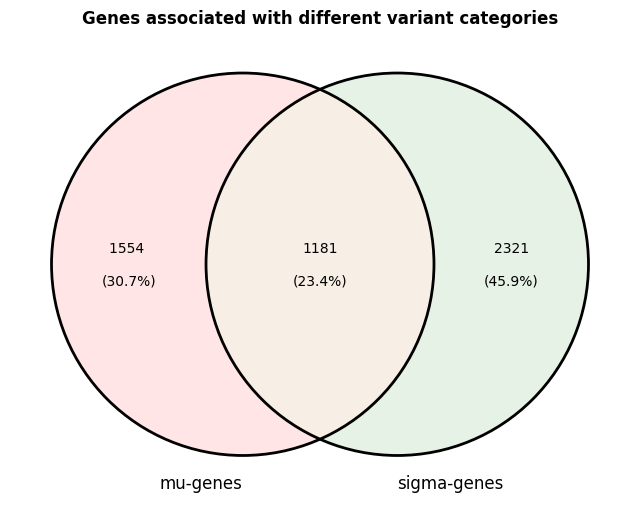

In [34]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted, venn3, venn3_circles, venn3_unweighted
#defining gene sets 
gene_sets = {
    "mu_only_genes": set(df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned
                            .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned["category"] == "mu_only_variants", "Gene_refGene"]
                            .dropna().unique()),
    
    "sigma_only_genes": set(df_SNPs_BMI_overlap_updated_with_splitted_genes
                               .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes["category"] == "sigma_only_variants", "Gene_refGene"]
                               .dropna().unique()),
    
    "shared_genes": set(df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned
                        .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned["category"] == "shared_variants", "Gene_refGene"]
                        .dropna().unique())
}


plt.figure(figsize=(8, 8))
set_mu_genes = gene_sets["mu_only_genes"].union(gene_sets["shared_genes"])
set_sigma_genes = gene_sets["sigma_only_genes"].union(gene_sets["shared_genes"])

mu_only_genes = len(set_mu_genes - set_sigma_genes)
sigma_only_genes = len(set_sigma_genes - set_mu_genes)
mu_and_sigma_genes = len(set_mu_genes & set_sigma_genes)
total = mu_only_genes + sigma_only_genes + mu_and_sigma_genes

venn_labels = {
    '10': f"{mu_only_genes} \n\n({(mu_only_genes / total) * 100:.1f}%)",
    '01': f"{sigma_only_genes}\n\n({(sigma_only_genes / total) * 100:.1f}%)",
    '11': f"{mu_and_sigma_genes}\n\n({(mu_and_sigma_genes / total) * 100:.1f}%)"
}

venn = venn2_unweighted([set_mu_genes, set_sigma_genes], ('mu-genes', 
                                                   'sigma-genes'), alpha = 0.1)

for subset, label in venn_labels.items():
    if venn.get_label_by_id(subset):  # Avoid NoneType errors
        venn.get_label_by_id(subset).set_text(label)

venn2_circles(subsets=(1,1,1), 
              #linestyle = "dashed", 
              linewidth = 2
             ) 
plt.title("Genes associated with different variant categories", fontweight="bold")
plt.show()

In [35]:
"""
#save mu_genes and sigma_genes in a txt file to do enrichment analysis
with open("/home/kunwar/SNP_BMI/mu_genes.txt", "w") as f1:
    for gene in sorted(set_mu_genes):
        f1.write(f"{gene}\n")

with open("/home/kunwar/SNP_BMI/sigma_genes.txt", "w") as f2:
    for gene in sorted(set_sigma_genes):
        f2.write(f"{gene}\n")

"""

'\n#save mu_genes and sigma_genes in a txt file to do enrichment analysis\nwith open("/home/kunwar/SNP_BMI/mu_genes.txt", "w") as f1:\n    for gene in sorted(set_mu_genes):\n        f1.write(f"{gene}\n")\n\nwith open("/home/kunwar/SNP_BMI/sigma_genes.txt", "w") as f2:\n    for gene in sorted(set_sigma_genes):\n        f2.write(f"{gene}\n")\n\n'

### overlap of variants at LD-Block level

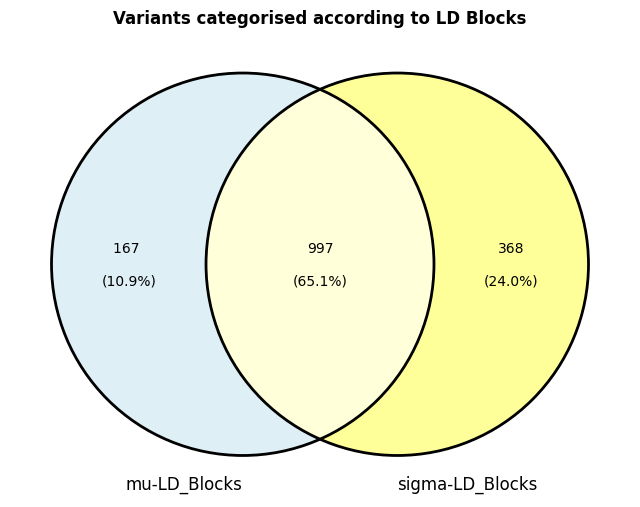

In [36]:
LD_Block_sets = {
    "mu_only_LD_Blocks": set(df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned
                            .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned["category"] == "mu_only_variants", "LD_Block"]
                            .dropna().unique()),
    
    "sigma_only_LD_Blocks": set(df_SNPs_BMI_overlap_updated_with_splitted_genes
                               .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes["category"] == "sigma_only_variants", "LD_Block"]
                               .dropna().unique()),
    
    "shared_LD_Blocks": set(df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned
                        .loc[df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned["category"] == "shared_variants", "LD_Block"]
                        .dropna().unique())
}

plt.figure(figsize=(8, 8))
set_mu_LD_Blocks = LD_Block_sets["mu_only_LD_Blocks"].union(LD_Block_sets["shared_LD_Blocks"])
set_sigma_LD_Blocks = LD_Block_sets["sigma_only_LD_Blocks"].union(LD_Block_sets["shared_LD_Blocks"])

mu_only_LD_Blocks = len(set_mu_LD_Blocks - set_sigma_LD_Blocks)
sigma_only_LD_Blocks = len(set_sigma_LD_Blocks - set_mu_LD_Blocks)
mu_and_sigma_LD_Blocks = len(set_mu_LD_Blocks & set_sigma_LD_Blocks)
total = mu_only_LD_Blocks + sigma_only_LD_Blocks + mu_and_sigma_LD_Blocks

venn_labels = {
    '10': f"{mu_only_LD_Blocks} \n\n({(mu_only_LD_Blocks / total) * 100:.1f}%)",
    '01': f"{sigma_only_LD_Blocks}\n\n({(sigma_only_LD_Blocks / total) * 100:.1f}%)",
    '11': f"{mu_and_sigma_LD_Blocks}\n\n({(mu_and_sigma_LD_Blocks / total) * 100:.1f}%)"
}
venn = venn2_unweighted([set_mu_LD_Blocks, set_sigma_LD_Blocks], ('mu-LD_Blocks', 
                                                           'sigma-LD_Blocks'),
                                                           set_colors=('lightblue', 'yellow'))
for subset, label in venn_labels.items():
    if venn.get_label_by_id(subset):  # Avoid NoneType errors
        venn.get_label_by_id(subset).set_text(label)
venn2_circles(subsets=(1,1,1), 
              #linestyle = "dashed", 
              linewidth = 2
             ) 
plt.title("Variants categorised according to LD Blocks", fontweight="bold")
plt.show()

### Scatter plot 

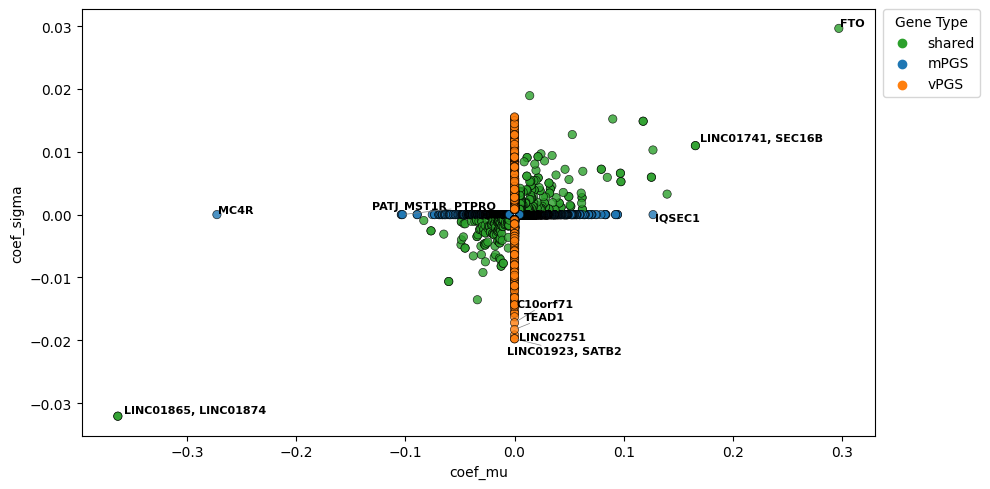

In [37]:
from adjustText import adjust_text

#Keep one SNP per gene (with max abs_coef_mu)
df_unique = df_SNPs_BMI_overlap_updated_with_splitted_genes_cleaned.sort_values("abs_coef_mu", ascending=False).drop_duplicates("Gene_refGene")

#Get top 5 genes from each category
top_mu_only = df_unique[df_unique["category"] == "mu_only_variants"].nlargest(5, "abs_coef_mu")
top_sigma_only = df_unique[df_unique["category"] == "sigma_only_variants"].nlargest(5, "abs_coef_sigma")
top_shared = df_unique[df_unique["category"] == "shared_variants"].nlargest(5, "abs_coef_mu")

# Combine top hits
df_top_annot = pd.concat([top_mu_only, top_sigma_only, top_shared])

plt.figure(figsize=(10, 5))
palette = {
    "mu_only_variants": "#1f77b4",
    "sigma_only_variants": "#ff7f0e",
    "shared_variants": "#2ca02c"
}

ax = sns.scatterplot(
    data=df_unique,
    x="coef_mu",
    y="coef_sigma",
    hue="category",
    palette=palette,
    alpha=0.8,
    edgecolor="black"
)

# Annotate top 5 genes per category
texts = []

#Group by coordinates and merge gene names
grouped_labels = (
    df_top_annot
    .groupby(["coef_mu", "coef_sigma"])["Gene_refGene"]
    .apply(lambda genes: ", ".join(sorted(set(genes))))
    .reset_index()
)

#annotate one label per unique coordinate
for _, row in grouped_labels.iterrows():
    texts.append(
        ax.text(
            row["coef_mu"],
            row["coef_sigma"],
            row["Gene_refGene"],
            fontsize=8,
            fontweight = "bold",
            color='black'
        )
    )

# Prevent text overlap with a single arrow per label
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

plt.xlabel("coef_mu")
plt.ylabel("coef_sigma")
#plt.title("Top Genes (mu_only: |μ|, sigma_only: |σ|, shared: |μ|+|σ|)")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ["shared", "mPGS", "vPGS"], title="Gene Type", loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)
#plt.legend(title="Category")
plt.tight_layout()
#plt.savefig("gene_types_BMI.pdf", bbox_inches='tight')
plt.show()